In [2]:
import pandas as pd
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import os

Preliminaries: BassModel class, time range

In [3]:
class BassModel: 
    def __init__(self, m):
        # self.zoneid = zoneid
        self.m = m

    def c_t(self, x, p, q):
        num = 1 - (p + q)
        denom = 1 + (p + q)
        result = self.m * (
        ((1 - (num / denom) ** (x + 1) / 2) / (1 + q / p * (num / denom) ** (x + 1) / 2)) - 
         ((1 - (num / denom) ** (x - 1) / 2) / (1 + q / p * (num / denom) ** (x - 1) / 2))
        )
        return result

In [4]:
class LogisticModel:
    def __init__(self, a):
        self.a = a

    def c_t(self, x, b, c):
        return self.a / (1 + c * np.exp(-b * x))

In [5]:
class GompertzModel:
    def __init__(self, a):
        self.a = a

    def c_t(self, x, b, c):
        return self.a * np.exp(-c * np.exp(-b * x))

Next, we need to figure out how long we'd like to forecast over. For now, let's say we'd like to do 5 years, so we're going from 41 months (since Jan 2021 = March 2024) to 41 + 12 * 5

In [6]:
time_range = pd.Series(list(range(39, 39 + 12 * 5)))  # 5 years of monthly data starting from month 39
time_range

0     39
1     40
2     41
3     42
4     43
5     44
6     45
7     46
8     47
9     48
10    49
11    50
12    51
13    52
14    53
15    54
16    55
17    56
18    57
19    58
20    59
21    60
22    61
23    62
24    63
25    64
26    65
27    66
28    67
29    68
30    69
31    70
32    71
33    72
34    73
35    74
36    75
37    76
38    77
39    78
40    79
41    80
42    81
43    82
44    83
45    84
46    85
47    86
48    87
49    88
50    89
51    90
52    91
53    92
54    93
55    94
56    95
57    96
58    97
59    98
dtype: int64

In [7]:
time_range2 = pd.Series(list(range(0, 39)))  # 5 years of monthly data starting from month 0 to 39
time_range2

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
dtype: int64

Now the time ranges for the 2017 - 2020 generation model

In [8]:
bass_input_all_canada = pd.read_csv("bass_input_all_canada_new_with_tesla_b.csv")
length_months_01_2017_positive = len(bass_input_all_canada[bass_input_all_canada['yr_month_dtype'] >= '2017-01-01'])
time_range3 = pd.Series(list(range(0, length_months_01_2017_positive)))
time_range3

0      0
1      1
2      2
3      3
4      4
      ..
82    82
83    83
84    84
85    85
86    86
Length: 87, dtype: int64

In [9]:
time_range4 = pd.Series(list(range(length_months_01_2017_positive, length_months_01_2017_positive + 12 * 5)))  # 5 years of monthly data starting from month 0 to 39 + 5 years
time_range4

0      87
1      88
2      89
3      90
4      91
5      92
6      93
7      94
8      95
9      96
10     97
11     98
12     99
13    100
14    101
15    102
16    103
17    104
18    105
19    106
20    107
21    108
22    109
23    110
24    111
25    112
26    113
27    114
28    115
29    116
30    117
31    118
32    119
33    120
34    121
35    122
36    123
37    124
38    125
39    126
40    127
41    128
42    129
43    130
44    131
45    132
46    133
47    134
48    135
49    136
50    137
51    138
52    139
53    140
54    141
55    142
56    143
57    144
58    145
59    146
dtype: int64

In [10]:
time_range5 = pd.Series(list(range(0, 38 + 12 * 5)))  # 5 years of monthly data starting from month 0
time_range5

0      0
1      1
2      2
3      3
4      4
      ..
93    93
94    94
95    95
96    96
97    97
Length: 98, dtype: int64

In [11]:
time_range6 = pd.Series(list(range(0, 145)))  # 5 years of monthly data starting from month 0 to 39 + 5 years
time_range6 

0        0
1        1
2        2
3        3
4        4
      ... 
140    140
141    141
142    142
143    143
144    144
Length: 145, dtype: int64

In [12]:
original_data = pd.read_csv('bass_input_all_canada_new_with_tesla_b.csv')

In [13]:
original_data.loc[(original_data['2021-2024'] > 0)|(original_data['months_passed_01_2021'] > 0)].head()

,Unnamed: 0,yr_month_dtype,1900-2005,2006-2010,2011-2015,2017-2020,2021-2024,months_passed_01_2017,months_passed_01_2021,Year-Month_x,Tesla_Purchases_from_2019_23_izev_data,Year-Month_y,Tesla_Purchases_from_2023_24_izev_data,Year-Month-2017-2020_x,Tesla_Purchases_2017-2020_from_2019_23_izev_data,Year-Month-2017-2020_y,Tesla_Purchases_2017-2020_from_2023_24_izev_data,2021-2024_Total_EV_Sales,2017-2020_Total_EV_Sales,ZoneID
51,51,2020-04-01,0.0,0.0,0.0,184.0,1.0,38.993917,-9.041591,0,0.0,0,0.0,2020-04-01 00:00:00,351.0,0,0.0,1.0,535.0,Canada_All
52,52,2020-05-01,0.0,0.0,1.0,341.0,1.0,39.980273,-8.055236,0,0.0,0,0.0,2020-05-01 00:00:00,240.0,0,0.0,1.0,581.0,Canada_All
53,53,2020-06-01,0.0,0.0,0.0,415.0,1.0,40.999507,-7.036002,0,0.0,0,0.0,2020-06-01 00:00:00,1593.0,0,0.0,1.0,2008.0,Canada_All
54,54,2020-07-01,0.0,0.0,2.0,450.0,7.0,41.985862,-6.049647,0,0.0,0,0.0,2020-07-01 00:00:00,411.0,0,0.0,7.0,861.0,Canada_All
55,55,2020-08-01,0.0,0.0,6.0,461.0,95.0,43.005096,-5.030413,0,0.0,0,0.0,2020-08-01 00:00:00,367.0,0,0.0,95.0,828.0,Canada_All


### All Canada Simulation

All Canada Prediction - All Parameters Simulated

In [14]:
# input_folder_me_estimated_all_canada = '..\\bass_all_canada_m_estimated_05_06_26'
input_folder_me_estimated_all_canada = "..\\bass_all_canada_m_estimated_07_06_26_newer_vehicles_with_random_seed"

In [15]:
params_all_canada_m_estimated = pd.read_csv(f'.\\{input_folder_me_estimated_all_canada}\\all_canada_param_sims.csv')
# params_all_canada_m_estimated = pd.read_csv(f'.\\{input_folder_me_estimated_all_canada}\\all_canada_param_sims_05_01_26.csv')
params_all_canada_m_estimated

,p,q,m
0,7.599523e-07,0.164213,38885.197127
1,1.232877e-06,0.154217,41163.417190
2,2.088989e-06,0.127022,53502.194869
3,9.441423e-07,0.165369,43237.387607
4,2.797160e-06,0.112121,43642.816088
...,...,...,...
995,5.930775e-07,0.174228,42130.457631
996,1.394799e-06,0.146237,50134.905597
997,-1.042884e-06,0.213081,33431.890458
998,-1.914036e-07,0.195917,39146.327915


In [16]:
# params_all_canada_m_estimated['p'] = 5.9e-7   # Since it wasn't statistically different from zero

In [17]:
best_fit_params_m_estimated = pd.read_csv("..\\results_bass_all_canada_m_estimated_05_06_26.csv")
best_fit_params_m_estimated

,ZoneID,p,p_se,p_t,q,q_se,q_t,m,m_se,m_t,R2,RMSE
0,NaN,5.929273e-07,0.000001,0.459198,0.170126,0.034749,4.895894,42750.887517,6897.403567,6.198113,0.438549,1855.577849


In [18]:
# Remove the rows with 2.5% largest and smallest values in the 'p' column
# params_all_canada_m_estimated = params_all_canada_m_estimated[(params_all_canada_m_estimated['p'] > params_all_canada_m_estimated['p'].quantile(0.2)) &   # Because p is zero, no need to filter
#                                                                  (params_all_canada_m_estimated['p'] < params_all_canada_m_estimated['p'].quantile(0.8))]
params_all_canada_m_estimated = params_all_canada_m_estimated[(params_all_canada_m_estimated['p'] > 0) &   # Because p is zero, no need to filter
                                                                 (params_all_canada_m_estimated['p'] < params_all_canada_m_estimated['p'].quantile(0.975))]
params_all_canada_m_estimated = params_all_canada_m_estimated[(params_all_canada_m_estimated['q'] > params_all_canada_m_estimated['q'].quantile(0.025)) &
                                                                (params_all_canada_m_estimated['q'] < params_all_canada_m_estimated['q'].quantile(0.975))].reset_index(drop=True)
params_all_canada_m_estimated = params_all_canada_m_estimated[(params_all_canada_m_estimated['m'] > params_all_canada_m_estimated['m'].quantile(0.025)) &
                                                                (params_all_canada_m_estimated['m'] < params_all_canada_m_estimated['m'].quantile(0.975))].reset_index(drop=True)

In [19]:
output_all_canada_m_estimated = pd.DataFrame()
for i in range(len(params_all_canada_m_estimated)):
    market_size_all_canada_i = params_all_canada_m_estimated.loc[i, 'm']
    model = BassModel(market_size_all_canada_i)
    prediction_model = partial(model.c_t, p=params_all_canada_m_estimated.loc[i, 'p'], q=params_all_canada_m_estimated.loc[i, 'q'])
    predictions = time_range.apply(prediction_model)
    output_all_canada_m_estimated = pd.concat([output_all_canada_m_estimated, predictions.rename(i)], axis=1)
output_all_canada_m_estimated.index = time_range

In [20]:
params_all_canada_m_estimated.describe()

,p,q,m
count,5.800000e+02,580.000000,580.000000
mean,1.120307e-06,0.155810,45224.262048
std,6.874881e-07,0.018448,4619.644988
min,4.546287e-09,0.112976,35584.892476
25%,5.537122e-07,0.141682,41839.628500
50%,1.057573e-06,0.158462,45011.645820
75%,1.596525e-06,0.170814,48585.677581
max,2.834667e-06,0.186505,56206.088794


In [21]:
model3 = BassModel(best_fit_params_m_estimated['m'][0])
prediction_model3 = partial(model3.c_t, p=best_fit_params_m_estimated['p'][0], q=best_fit_params_m_estimated['q'][0])
predictions3 = time_range5.apply(prediction_model3)
# output_all_canada_m_estimated = pd.concat([output_all_canada_m_estimated, predictions3.rename('best_fit')], axis=1)
output_all_canada_m_estimated_summarized = pd.concat([
    output_all_canada_m_estimated.max(axis=1).rename('max'),
    output_all_canada_m_estimated.min(axis=1).rename('min'),
    predictions3.rename('best_fit')
], axis=1)
output_all_canada_m_estimated_summarized

,max,min,best_fit
39,8753.540384,1428.272187,4318.264503
40,8426.705443,1949.697609,3419.556907
41,8778.241263,1549.943038,2633.462454
42,8599.521507,1126.022445,1984.679058
43,7931.594814,809.026262,1471.389618
...,...,...,...
34,NaN,NaN,7208.627177
35,NaN,NaN,7232.465475
36,NaN,NaN,6855.925640
37,NaN,NaN,6157.279607


In [22]:
output_all_canada_m_estimated.max(axis=1), output_all_canada_m_estimated.min(axis=1)

(39    8753.540384
 40    8426.705443
 41    8778.241263
 42    8599.521507
 43    7931.594814
 44    6917.642346
 45    6408.462573
 46    7192.829287
 47    7628.809079
 48    7621.588374
 49    7172.800139
 50    6379.794959
 51    5394.367711
 52    4368.222696
 53    3414.404997
 54    2595.433587
 55    1931.168060
 56    1441.173680
 57    1179.278269
 58     960.075693
 59     778.381854
 60     628.952124
 61     506.827212
 62     407.519798
 63     327.092347
 64     262.165822
 65     209.888130
 66     167.882015
 67     134.185023
 68     107.189183
 69      85.584630
 70      68.309203
 71      54.504685
 72      43.479612
 73      34.678115
 74      27.654124
 75      22.050181
 76      17.580160
 77      14.015233
 78      11.172526
 79       8.905973
 80       7.098957
 81       5.658409
 82       4.510072
 83       3.594712
 84       2.865088
 85       2.283528
 86       1.819996
 87       1.450545
 88       1.156083
 89       0.921393
 90       0.734343
 91       0.

In [23]:

models_21_24 = original_data.loc[original_data['months_passed_01_2021'] >= 0, '2021-2024_Total_EV_Sales'].reset_index(drop=True)
models_21_24

0      181.0
1     1847.0
2     1311.0
3     1123.0
4      897.0
5     2205.0
6     1470.0
7     2117.0
8     2226.0
9     4059.0
10    1189.0
11     357.0
12     702.0
13    3839.0
14    2128.0
15     757.0
16    1543.0
17     735.0
18     972.0
19    2778.0
20    1687.0
21     717.0
22     633.0
23     620.0
24     727.0
25    1520.0
26    2324.0
27    1655.0
28    2012.0
29    3959.0
30    1478.0
31    9872.0
32    8947.0
33    6443.0
34    7235.0
35    7383.0
36    2515.0
37    4889.0
38    7144.0
Name: 2021-2024_Total_EV_Sales, dtype: float64

In [24]:
output_all_canada_m_estimated

,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,574,575,576,577,578,579
39,4250.657714,4828.226714,6583.360656,3945.713517,7375.130442,5947.835234,4411.947450,6054.838264,3988.431903,5417.567259,...,4473.982988,7327.551737,6224.056610,6040.818096,5174.959756,4469.639881,6026.652426,3547.915833,6679.143016,3772.850478
40,3456.144116,4081.506246,6777.740417,3116.164194,6700.487702,5032.072868,3524.531411,5910.621442,3069.370149,4448.313319,...,3528.927230,6101.117883,5189.170094,6061.350627,4244.552306,3663.340405,5906.138510,2721.989813,6008.241214,2970.660441
41,2727.902159,3345.398924,6758.580387,2401.616108,5874.631352,4106.861713,2728.695635,5575.265012,2301.972208,3502.565017,...,2701.250398,4844.837720,4195.933927,5887.420575,3376.475347,2916.995529,5588.887615,2040.330095,5218.763450,2281.689059
42,2102.841012,2673.080065,6528.252520,1816.153163,4991.418061,3253.994173,2061.458644,5091.089849,1693.120741,2667.403987,...,2020.365907,3703.470363,3309.271537,5540.536858,2620.831698,2269.507533,5115.927060,1502.763273,4396.467728,1719.181581
43,1591.560527,2092.571273,6114.521600,1353.752525,4128.742405,2518.023379,1528.627362,4512.809446,1227.474092,1979.932030,...,1484.977289,2748.879897,2558.832094,5060.909697,1995.665097,1734.000068,4542.288443,1092.531822,3608.962062,1276.639536
44,1187.905344,1611.931822,5563.770947,998.245986,3339.798213,1912.971151,1117.873682,3895.761310,880.590831,1441.702262,...,1077.483120,1995.846400,1948.360143,4498.194136,1497.476767,1306.518979,3924.748502,786.782819,2899.788699,937.780743
45,877.403799,1226.295243,4930.730443,730.241884,2653.028539,1433.015696,809.188889,3286.800442,626.976276,1035.124371,...,774.499518,1425.920441,1466.176052,3901.756886,1111.288493,974.101335,3312.034151,562.726247,2290.043248,683.376231
46,643.060815,924.073689,4268.300131,531.069778,2077.182688,1062.183968,581.415540,2719.632071,444.000170,735.703533,...,552.955021,1007.006787,1093.562499,3313.306027,817.927604,720.556584,2739.585734,400.501561,1783.882778,495.085159
47,468.632139,691.340477,3620.226899,384.576299,1607.920647,781.146109,415.531172,2214.271773,313.221420,519.122860,...,392.873846,705.345659,810.241804,2763.132756,598.359269,529.898429,2228.711254,284.046193,1374.779934,357.155469
48,340.100202,514.438416,3017.661843,277.631680,1233.719163,571.144658,295.841881,1779.173157,220.365964,364.429960,...,278.174987,491.208015,597.368894,2269.665006,435.786148,388.012930,1788.651253,200.952204,1050.754484,256.864169


In [25]:
# Series of 100 months starting '01-2021'
data_coverage = pd.date_range(start='2021-01-01', periods=len(output_all_canada_m_estimated_summarized), freq='M')
data_coverage

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_16208\1036247769.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_coverage = pd.date_range(start='2021-01-01', periods=len(output_all_canada_m_estimated_summarized), freq='M')


DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
      

The size of the confidence interval depends on the number of valid values of p

In [26]:
# params_all_canada_m_estimated_orig = pd.read_csv(f'.\\{input_folder_me_estimated_all_canada}\\all_canada_param_sims_05_01_26.csv')
params_all_canada_m_estimated_orig = pd.read_csv(f'.\\{input_folder_me_estimated_all_canada}\\all_canada_param_sims.csv')
params_all_canada_m_estimated_orig.loc[params_all_canada_m_estimated_orig['p'] > 0, 'p'].shape

(671,)

In [27]:
output_all_canada_m_estimated.shape[1] / params_all_canada_m_estimated_orig.loc[params_all_canada_m_estimated_orig['p'] > 0, 'p'].shape[0]

0.8643815201192251

Adding line showing post-March 2024 sales

In [28]:
all_vehicles_monthly = pd.read_csv('izev_data\\izev_all_vehicles_purchases_monthly_counts_2024_25_b.csv')
all_vehicles_monthly['Month_year'] = pd.to_datetime(all_vehicles_monthly['Month_year'].astype(str))
# Reindex starting at 39
all_vehicles_monthly.index = all_vehicles_monthly.index + 39
all_vehicles_monthly

,Month_year,Count
39,2024-04-01,8703
40,2024-05-01,9241
41,2024-06-01,6248
42,2024-07-01,8097
43,2024-08-01,7905
44,2024-09-01,6424
45,2024-10-01,6973
46,2024-11-01,7500
47,2024-12-01,8928
48,2025-01-01,4172


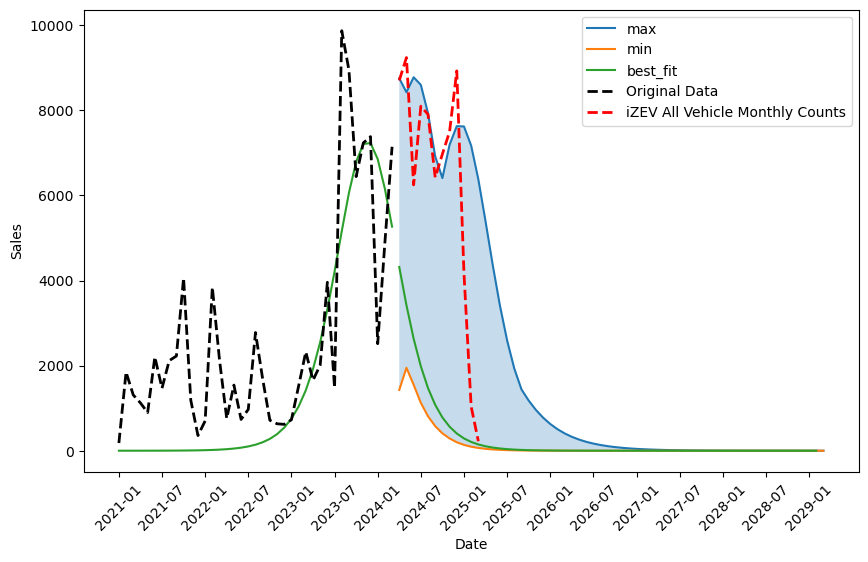

In [29]:
# Plot summarized predictions (e.g. mean/central estimate if present)
output_all_canada_m_estimated_summarized.plot(
    legend=False,
    # title='All Canada Predictions with Estimated m',
    figsize=(10, 6)
)

# Shade area between min and max
plt.fill_between(
    output_all_canada_m_estimated_summarized.index,
    output_all_canada_m_estimated_summarized['min'],
    output_all_canada_m_estimated_summarized['max'],
    alpha=0.25
)

# Plot original data
plt.plot(
    models_21_24,
    label='Original Data',
    color='black',
    linewidth=2,
    linestyle='--'
)

plt.plot(
    all_vehicles_monthly['Count'],
    label='iZEV All Vehicle Monthly Counts',
    color='red',
    linewidth=2,
    linestyle='--'
)

# Only tick every 6th month
tick_positions = np.arange(0, len(data_coverage), 6)
tick_labels = data_coverage.strftime('%Y-%m')[::6]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

plt.xlabel('Date')
plt.ylabel('Sales')

# Legend
plt.legend()

plt.show()


<Axes: >

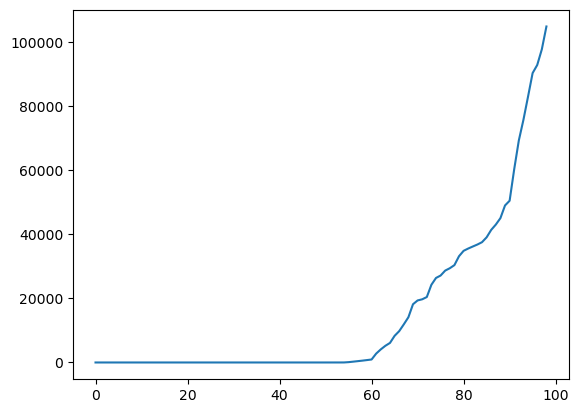

In [30]:
original_data['2021-2024_Total_EV_Sales'].cumsum().plot()

The shape of the curve messing with logistic and gompertz models

Looking at previous generation (2017 - 2020 EVs)

In [31]:
original_data.columns

Index(['Unnamed: 0', 'yr_month_dtype', '1900-2005', '2006-2010', '2011-2015',
       '2017-2020', '2021-2024', 'months_passed_01_2017',
       'months_passed_01_2021', 'Year-Month_x',
       'Tesla_Purchases_from_2019_23_izev_data', 'Year-Month_y',
       'Tesla_Purchases_from_2023_24_izev_data', 'Year-Month-2017-2020_x',
       'Tesla_Purchases_2017-2020_from_2019_23_izev_data',
       'Year-Month-2017-2020_y',
       'Tesla_Purchases_2017-2020_from_2023_24_izev_data',
       '2021-2024_Total_EV_Sales', '2017-2020_Total_EV_Sales', 'ZoneID'],
      dtype='object')

In [32]:
models_17_20 = original_data.loc[original_data['months_passed_01_2017'] >= 0, '2017-2020_Total_EV_Sales'].reset_index(drop=True)

In [33]:
input_folder_me_estimated_all_canada_prev_gen = 'bass_all_canada_m_estimated_07_06_26_older_vehicles'

In [34]:
best_fit_params_m_estimated_prev_gen = pd.read_csv("../results_bass_all_canada_m_estimated_07_06_26_older_vehicles.csv")
best_fit_params_m_estimated_prev_gen

,ZoneID,p,p_se,p_t,q,q_se,q_t,m,m_se,m_t,R2,RMSE
0,NaN,0.000059,0.000034,1.757881,0.089982,0.008799,10.225881,16245.343393,1280.075479,12.690926,0.649277,344.421282


In [35]:
params_all_canada_m_estimated_prev_gen = pd.read_csv(f'..\\{input_folder_me_estimated_all_canada_prev_gen}\\all_canada_param_sims.csv')
params_all_canada_m_estimated_prev_gen

,p,q,m
0,0.000069,0.086076,15527.892261
1,0.000083,0.083989,15950.698833
2,0.000086,0.081457,18240.607685
3,0.000074,0.088683,16335.599456
4,0.000129,0.071552,16410.841453
...,...,...,...
995,0.000064,0.091000,16130.168350
996,0.000070,0.085988,17615.684722
997,0.000021,0.099193,14515.832920
998,0.000045,0.096533,15576.354574


In [36]:
# Remove negative values
params_all_canada_m_estimated_prev_gen = params_all_canada_m_estimated_prev_gen[(params_all_canada_m_estimated_prev_gen['p'] > 0) &   # Because p is zero, no need to filter
                                                                                                 (params_all_canada_m_estimated_prev_gen['p'] < params_all_canada_m_estimated_prev_gen['p'].quantile(0.975))]
params_all_canada_m_estimated_prev_gen.describe()

,p,q,m
count,9.340000e+02,934.000000,934.000000
mean,5.932360e-05,0.089911,16292.227575
std,2.695239e-05,0.007200,1220.632149
min,5.401202e-07,0.069547,12648.619725
25%,3.977812e-05,0.085094,15502.685157
50%,5.782237e-05,0.090051,16282.226355
75%,7.859938e-05,0.095586,17094.401531
max,1.206601e-04,0.105956,19542.113483


In [37]:
# Remove the rows with 2.5% largest and smallest values in the 'p' column
params_all_canada_m_estimated_prev_gen = params_all_canada_m_estimated_prev_gen[(params_all_canada_m_estimated_prev_gen['p'] > params_all_canada_m_estimated_prev_gen['p'].quantile(0.025)) &
                                                                (params_all_canada_m_estimated_prev_gen['p'] < params_all_canada_m_estimated_prev_gen['p'].quantile(0.975))]
params_all_canada_m_estimated_prev_gen = params_all_canada_m_estimated_prev_gen[(params_all_canada_m_estimated_prev_gen['q'] > params_all_canada_m_estimated_prev_gen['q'].quantile(0.025)) &
                                                                (params_all_canada_m_estimated_prev_gen['q'] < params_all_canada_m_estimated_prev_gen['q'].quantile(0.975))].reset_index(drop=True)
params_all_canada_m_estimated_prev_gen = params_all_canada_m_estimated_prev_gen[(params_all_canada_m_estimated_prev_gen['m'] > params_all_canada_m_estimated_prev_gen['m'].quantile(0.025)) &
                                                                (params_all_canada_m_estimated_prev_gen['m'] < params_all_canada_m_estimated_prev_gen['m'].quantile(0.975))].reset_index(drop=True)

In [38]:
output_all_canada_m_estimated_prev_gen = pd.DataFrame()
for i in range(len(params_all_canada_m_estimated_prev_gen)):
    market_size_all_canada_i = params_all_canada_m_estimated_prev_gen.loc[i, 'm']
    model = BassModel(market_size_all_canada_i)
    prediction_model = partial(model.c_t, p=params_all_canada_m_estimated_prev_gen.loc[i, 'p'], q=params_all_canada_m_estimated_prev_gen.loc[i, 'q'])
    predictions = time_range4.apply(prediction_model)
    output_all_canada_m_estimated_prev_gen = pd.concat([output_all_canada_m_estimated_prev_gen, predictions.rename(i)], axis=1)
output_all_canada_m_estimated_prev_gen.index = time_range4

In [39]:
output_all_canada_m_estimated_prev_gen

,0,1,2,3,4,5,6,7,8,9,...,788,789,790,791,792,793,794,795,796,797
87,0.995550,1.166869,1.887016,0.660510,1.000997,0.987779,0.230309,0.751226,2.004284,0.483094,...,0.440459,0.631715,0.800518,0.956290,2.200561,0.528963,1.130861,0.403637,0.313775,0.711966
88,0.837680,0.985950,1.602625,0.552839,0.839046,0.825898,0.189011,0.628044,1.709444,0.401135,...,0.364784,0.525400,0.669286,0.804745,1.876737,0.440677,0.951700,0.330781,0.258510,0.596585
89,0.704838,0.833073,1.361074,0.462717,0.703291,0.690540,0.155118,0.525056,1.457953,0.333078,...,0.302110,0.436974,0.559563,0.677210,1.600537,0.367125,0.800916,0.271074,0.212978,0.499900
90,0.593057,0.703894,1.155916,0.387285,0.589497,0.577362,0.127302,0.438954,1.243443,0.276567,...,0.250203,0.363429,0.467826,0.569883,1.364964,0.305848,0.674016,0.222144,0.175466,0.418881
91,0.499001,0.594742,0.981672,0.324148,0.494112,0.482731,0.104474,0.366970,1.060482,0.229643,...,0.207214,0.302261,0.391126,0.479562,1.164049,0.254798,0.567219,0.182045,0.144560,0.350991
92,0.419859,0.502512,0.833686,0.271303,0.414159,0.403608,0.085740,0.306789,0.904433,0.190680,...,0.171610,0.251388,0.327000,0.403554,0.992695,0.212268,0.477341,0.149184,0.119097,0.294104
93,0.353268,0.424583,0.708003,0.227072,0.347142,0.337452,0.070365,0.256476,0.771339,0.158328,...,0.142124,0.209076,0.273386,0.339591,0.846558,0.176837,0.401703,0.122255,0.098120,0.246436
94,0.297237,0.358737,0.601264,0.190052,0.290968,0.282139,0.057747,0.214414,0.657826,0.131464,...,0.117704,0.173886,0.228562,0.285765,0.721928,0.147319,0.338048,0.100186,0.080837,0.206493
95,0.250092,0.303102,0.510615,0.159067,0.243884,0.235892,0.047391,0.179250,0.561015,0.109158,...,0.097479,0.144618,0.191087,0.240470,0.615642,0.122729,0.284480,0.082101,0.066598,0.173024
96,0.210424,0.256094,0.433630,0.133134,0.204418,0.197225,0.038893,0.149852,0.478449,0.090637,...,0.080730,0.120276,0.159756,0.202354,0.525001,0.102243,0.239400,0.067281,0.054868,0.144979


In [40]:
model4 = BassModel(best_fit_params_m_estimated_prev_gen['m'][0])
prediction_model4 = partial(model4.c_t, p=best_fit_params_m_estimated_prev_gen['p'][0], q=best_fit_params_m_estimated_prev_gen['q'][0])
predictions4 = time_range6.apply(prediction_model4)
output_all_canada_m_estimated_prev_gen = pd.concat([output_all_canada_m_estimated_prev_gen, predictions4.rename('best_fit')], axis=1)


In [41]:
# Series of 100 months starting '01-2021'
data_coverage2 = pd.date_range(start='2017-01-01', periods=len(output_all_canada_m_estimated_prev_gen), freq='M')
data_coverage2

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_16208\2005365837.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_coverage2 = pd.date_range(start='2017-01-01', periods=len(output_all_canada_m_estimated_prev_gen), freq='M')


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31',
               ...
               '2028-06-30', '2028-07-31', '2028-08-31', '2028-09-30',
               '2028-10-31', '2028-11-30', '2028-12-31', '2029-01-31',
               '2029-02-28', '2029-03-31'],
              dtype='datetime64[ns]', length=147, freq='ME')

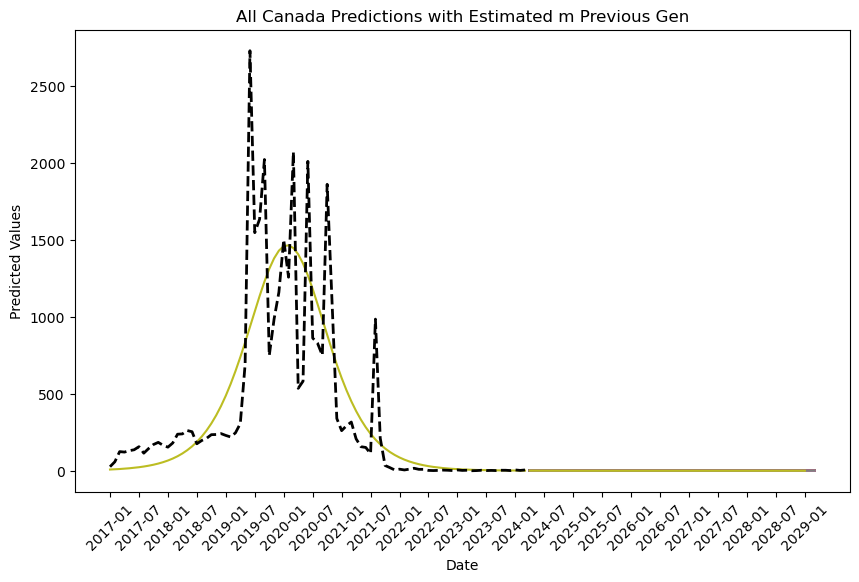

In [42]:
output_all_canada_m_estimated_prev_gen.plot(legend=False, title='All Canada Predictions with Estimated m Previous Gen', figsize=(10, 6))
# Plot original data
plt.plot(models_17_20, label='Original Data', color='black', linewidth=2, linestyle='--')
# only tick every 6th month
tick_positions = np.arange(0, len(data_coverage2), 6)
tick_labels    = data_coverage2.strftime('%Y-%m')[::6]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.show()

# Logistic Model

In [44]:
original_data_log_gomp = pd.read_csv('bass_input_all_canada_new_used_with_tesla.csv')

In [45]:
params_logistic = pd.read_csv('..\\all_canada_logistic_07_01_2026\\all_canada_param_sims_logistic.csv')
params_logistic

,a,b,c
0,4.561177e+05,0.082923,409.235065
1,6.483758e+05,0.081149,529.419075
2,1.689641e+06,0.072843,1275.596005
3,8.233973e+05,0.081480,710.437140
4,8.576114e+05,0.076115,549.828914
...,...,...,...
995,7.299839e+05,0.082763,666.195994
996,1.405476e+06,0.076172,1113.662822
997,-4.084871e+03,0.089938,209.749360
998,4.781543e+05,0.086154,539.167599


In [46]:
best_fit_params_logistic = pd.read_csv('..\\results_csv_logistic_all_canada_06_01_2026.csv')
best_fit_params_logistic

,ZoneID,a,a_se,a_t,b,b_se,b_t,c,c_se,c_t,R2,RMSE
0,NaN,782356.204398,582074.485711,1.344083,0.081841,0.006004,13.630175,694.053892,381.516618,1.819197,0.675895,1662.660895


In [47]:
models_21_24_cumsum = models_21_24.cumsum()

In [48]:
# Remove the rows with 2.5% largest and smallest values in the 'b' column
params_logistic = params_logistic[(params_logistic['b'] > params_logistic['b'].quantile(0.025)) &
                                  (params_logistic['b'] < params_logistic['b'].quantile(0.975))]
params_logistic = params_logistic[(params_logistic['c'] > params_logistic['c'].quantile(0.025)) &
                                  (params_logistic['c'] < params_logistic['c'].quantile(0.975))].reset_index(drop=True)
params_logistic = params_logistic[(params_logistic['a'] > params_logistic['a'].quantile(0.025)) &
                                  (params_logistic['a'] < params_logistic['a'].quantile(0.975))].reset_index(drop=True)

In [49]:
time_range_log2_orig = original_data_log_gomp.loc[(original_data_log_gomp['months_passed_01_2021'] >= 0)|(original_data_log_gomp['2021-2024_Total_EV_Sales'] > 0), 'months_passed_01_2021'].reset_index(drop=True)
time_range_log2 = time_range_log2_orig + np.abs(time_range_log2_orig.min())
time_range_log2

0      0.000000
1     13.973368
2     14.959724
3     15.978958
4     16.965313
5     17.984547
6     19.003781
7     19.990136
8     21.009370
9     21.995726
10    23.014960
11    24.034194
12    24.954792
13    25.974026
14    26.960381
15    27.979615
16    28.965971
17    29.985205
18    31.004439
19    31.990794
20    33.010028
21    33.996383
22    35.015617
23    36.034851
24    36.955450
25    37.974684
26    38.961039
27    39.980273
28    40.966628
29    41.985862
30    43.005096
31    43.991452
32    45.010686
33    45.997041
34    47.016275
35    48.035509
36    48.956107
37    49.975341
38    50.961697
39    51.980930
40    52.967286
41    53.986520
42    55.005754
43    55.992109
44    57.011343
45    57.997699
46    59.016932
47    60.036166
48    60.989643
Name: months_passed_01_2021, dtype: float64

In [50]:
time_range_log = pd.Series(list(range(61, 61 + 12 * 5)))    # +9 for the months in 2020 with sales
time_range_log

0      61
1      62
2      63
3      64
4      65
5      66
6      67
7      68
8      69
9      70
10     71
11     72
12     73
13     74
14     75
15     76
16     77
17     78
18     79
19     80
20     81
21     82
22     83
23     84
24     85
25     86
26     87
27     88
28     89
29     90
30     91
31     92
32     93
33     94
34     95
35     96
36     97
37     98
38     99
39    100
40    101
41    102
42    103
43    104
44    105
45    106
46    107
47    108
48    109
49    110
50    111
51    112
52    113
53    114
54    115
55    116
56    117
57    118
58    119
59    120
dtype: int64

In [51]:
time_range_log3 = pd.concat([time_range_log2, time_range_log]).reset_index(drop=True)
time_range_log3

0        0.000000
1       13.973368
2       14.959724
3       15.978958
4       16.965313
          ...    
104    116.000000
105    117.000000
106    118.000000
107    119.000000
108    120.000000
Length: 109, dtype: float64

In [52]:
output_all_canada_logistic = pd.DataFrame()
for i in range(len(params_logistic)):
    model = LogisticModel(params_logistic.loc[i, 'a'])
    prediction_model = partial(model.c_t, b=params_logistic.loc[i, 'b'], c=params_logistic.loc[i, 'c'])
    predictions = time_range_log.apply(prediction_model)
    output_all_canada_logistic = pd.concat([output_all_canada_logistic, predictions.rename(i)], axis=1)
output_all_canada_logistic.index = time_range_log



In [53]:
# Inverse of cumsum on output_all_canada_logistic
output_all_canada_logistic = output_all_canada_logistic.diff()
output_all_canada_logistic = output_all_canada_logistic.dropna(axis=0, how='all')
output_all_canada_logistic

,0,1,2,3,4,5,6,7,8,9,...,846,847,848,849,850,851,852,853,854,855
62,7724.306241,8950.403616,9659.651602,8951.532094,9357.181198,7151.584273,8263.723727,10068.539640,11178.680278,9079.021297,...,8883.380173,3362.800526,9538.033140,9015.021639,8987.156528,9519.519362,8645.907312,-91.047407,8130.533493,9045.818211
63,7991.810748,9359.770320,10176.022798,9413.557120,9916.953286,7382.809215,8597.667642,10742.852278,11844.444615,9601.244129,...,9419.544743,3416.779473,10106.573148,9436.203154,9494.688364,9999.730521,9200.650568,-90.114423,8445.676137,9461.430590
64,8244.594261,9764.957098,10698.427431,9882.899346,10494.489596,7595.798546,8920.631084,11449.108766,12524.234471,10138.678099,...,9975.876227,3458.186106,10692.545951,9853.972880,10015.617820,10480.374923,9781.223479,-88.838002,8746.381342,9871.914878
65,8479.923384,10162.816245,11223.859612,10357.454853,11088.080406,7787.810440,9229.452393,12186.803167,13214.450478,10689.687345,...,10551.406419,3486.382000,11294.102880,10265.120908,10548.170380,10958.050895,10387.407785,-87.237932,9029.298784,10273.904401
66,8695.128858,10550.018021,11748.970129,10834.858390,11695.654238,7956.266992,9520.922721,12955.064175,13910.950004,11252.321355,...,11144.880597,3500.925781,11909.020643,10666.235617,11090.262536,11429.067526,11018.741732,-85.338413,9291.098839,10663.849413
67,8887.664525,10923.094598,12270.085383,11312.489132,12314.761020,8098.823694,9791.847086,13752.612086,14609.054374,11824.302984,...,11754.735424,3501.587684,12534.685868,11053.747239,11639.493792,11889.482611,11674.490476,-83.167304,9528.547169,11038.067629
68,9055.167324,11278.492640,12783.237198,11787.482794,12942.561078,8213.436027,10039.110838,14577.716665,15303.571993,12403.021638,...,12379.079412,3488.357217,13168.086078,11423.980711,12193.144370,12335.152214,12353.616490,-80.755288,9738.582933,11392.804116
69,9195.516055,11612.633723,13284.204168,12256.750702,13575.821306,8298.420045,10259.749535,15428.157282,15988.839267,12985.532716,...,13015.676946,3461.443517,13805.808533,11773.217088,12748.179628,12761.791698,13054.750738,-78.135001,9918.397712,11724.299494
70,9306.886561,11921.981327,13768.564772,12717.006246,14210.919905,8352.503990,10451.019822,16301.186945,16658.780720,13568.564363,...,13661.936943,3421.268361,14444.048310,12097.762334,13301.262156,13165.047465,13776.165480,-75.340168,10065.511903,12028.864858
71,9387.800944,12203.112668,14231.761982,13164.798943,14843.860953,8374.868257,10610.468639,17193.502027,17306.988981,14148.532502,...,14314.907251,3368.452240,15078.626907,12394.021741,13848.772375,13540.578072,14515.749737,-72.404772,10177.845203,12302.961283


<Axes: title={'center': 'All Canada Logistic Predictions'}>

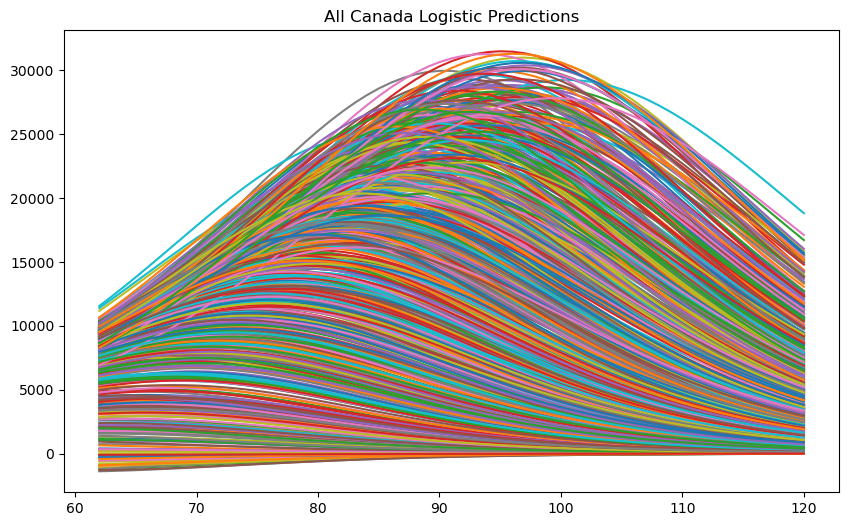

In [54]:
output_all_canada_logistic.plot(legend=False, title='All Canada Logistic Predictions', figsize=(10, 6))

In [55]:
output_all_canada_logistic_summarized = pd.concat([
    output_all_canada_logistic.max(axis=1).rename('max'),
    output_all_canada_logistic.min(axis=1).rename('min'),
], axis=1)

In [56]:
output_all_canada_logistic

,0,1,2,3,4,5,6,7,8,9,...,846,847,848,849,850,851,852,853,854,855
62,7724.306241,8950.403616,9659.651602,8951.532094,9357.181198,7151.584273,8263.723727,10068.539640,11178.680278,9079.021297,...,8883.380173,3362.800526,9538.033140,9015.021639,8987.156528,9519.519362,8645.907312,-91.047407,8130.533493,9045.818211
63,7991.810748,9359.770320,10176.022798,9413.557120,9916.953286,7382.809215,8597.667642,10742.852278,11844.444615,9601.244129,...,9419.544743,3416.779473,10106.573148,9436.203154,9494.688364,9999.730521,9200.650568,-90.114423,8445.676137,9461.430590
64,8244.594261,9764.957098,10698.427431,9882.899346,10494.489596,7595.798546,8920.631084,11449.108766,12524.234471,10138.678099,...,9975.876227,3458.186106,10692.545951,9853.972880,10015.617820,10480.374923,9781.223479,-88.838002,8746.381342,9871.914878
65,8479.923384,10162.816245,11223.859612,10357.454853,11088.080406,7787.810440,9229.452393,12186.803167,13214.450478,10689.687345,...,10551.406419,3486.382000,11294.102880,10265.120908,10548.170380,10958.050895,10387.407785,-87.237932,9029.298784,10273.904401
66,8695.128858,10550.018021,11748.970129,10834.858390,11695.654238,7956.266992,9520.922721,12955.064175,13910.950004,11252.321355,...,11144.880597,3500.925781,11909.020643,10666.235617,11090.262536,11429.067526,11018.741732,-85.338413,9291.098839,10663.849413
67,8887.664525,10923.094598,12270.085383,11312.489132,12314.761020,8098.823694,9791.847086,13752.612086,14609.054374,11824.302984,...,11754.735424,3501.587684,12534.685868,11053.747239,11639.493792,11889.482611,11674.490476,-83.167304,9528.547169,11038.067629
68,9055.167324,11278.492640,12783.237198,11787.482794,12942.561078,8213.436027,10039.110838,14577.716665,15303.571993,12403.021638,...,12379.079412,3488.357217,13168.086078,11423.980711,12193.144370,12335.152214,12353.616490,-80.755288,9738.582933,11392.804116
69,9195.516055,11612.633723,13284.204168,12256.750702,13575.821306,8298.420045,10259.749535,15428.157282,15988.839267,12985.532716,...,13015.676946,3461.443517,13805.808533,11773.217088,12748.179628,12761.791698,13054.750738,-78.135001,9918.397712,11724.299494
70,9306.886561,11921.981327,13768.564772,12717.006246,14210.919905,8352.503990,10451.019822,16301.186945,16658.780720,13568.564363,...,13661.936943,3421.268361,14444.048310,12097.762334,13301.262156,13165.047465,13776.165480,-75.340168,10065.511903,12028.864858
71,9387.800944,12203.112668,14231.761982,13164.798943,14843.860953,8374.868257,10610.468639,17193.502027,17306.988981,14148.532502,...,14314.907251,3368.452240,15078.626907,12394.021741,13848.772375,13540.578072,14515.749737,-72.404772,10177.845203,12302.961283


In [57]:

models_21_24_log = original_data.loc[(original_data['months_passed_01_2021'] >= 0)|(original_data['2021-2024'] > 0), '2021-2024_Total_EV_Sales'].reset_index(drop=True)
models_21_24_log

0        1.0
1        1.0
2        1.0
3        7.0
4       95.0
5      151.0
6      158.0
7      161.0
8      176.0
9      181.0
10    1847.0
11    1311.0
12    1123.0
13     897.0
14    2205.0
15    1470.0
16    2117.0
17    2226.0
18    4059.0
19    1189.0
20     357.0
21     702.0
22    3839.0
23    2128.0
24     757.0
25    1543.0
26     735.0
27     972.0
28    2778.0
29    1687.0
30     717.0
31     633.0
32     620.0
33     727.0
34    1520.0
35    2324.0
36    1655.0
37    2012.0
38    3959.0
39    1478.0
40    9872.0
41    8947.0
42    6443.0
43    7235.0
44    7383.0
45    2515.0
46    4889.0
47    7144.0
Name: 2021-2024_Total_EV_Sales, dtype: float64

In [58]:
models_21_24_log.index = time_range_log2.drop(0).reset_index(drop=True)

In [59]:
best_fit_params_logistic['a'][0], best_fit_params_logistic['b'][0], best_fit_params_logistic['c'][0]

(782356.2043983182, 0.0818410936576305, 694.053892443709)

In [60]:
# Number of months to shift backward
month_shift = int(np.abs(time_range_log2_orig.min()))

base_date = pd.Timestamp("2021-01-01")

# Convert each t in time_range_log3 to a calendar date using DateOffset (NOT timedelta)
raw_dates = pd.DatetimeIndex([
    base_date + pd.DateOffset(months=int(t - month_shift))
    for t in time_range_log3
])

# Round to nearest 6-month period (semiannual)
data_coverage_log = (
    raw_dates
    .to_period("6M")
    .to_timestamp(how="start")   # Jan 1 / Jul 1 anchors
)


In [61]:
output_all_canada_logistic

,0,1,2,3,4,5,6,7,8,9,...,846,847,848,849,850,851,852,853,854,855
62,7724.306241,8950.403616,9659.651602,8951.532094,9357.181198,7151.584273,8263.723727,10068.539640,11178.680278,9079.021297,...,8883.380173,3362.800526,9538.033140,9015.021639,8987.156528,9519.519362,8645.907312,-91.047407,8130.533493,9045.818211
63,7991.810748,9359.770320,10176.022798,9413.557120,9916.953286,7382.809215,8597.667642,10742.852278,11844.444615,9601.244129,...,9419.544743,3416.779473,10106.573148,9436.203154,9494.688364,9999.730521,9200.650568,-90.114423,8445.676137,9461.430590
64,8244.594261,9764.957098,10698.427431,9882.899346,10494.489596,7595.798546,8920.631084,11449.108766,12524.234471,10138.678099,...,9975.876227,3458.186106,10692.545951,9853.972880,10015.617820,10480.374923,9781.223479,-88.838002,8746.381342,9871.914878
65,8479.923384,10162.816245,11223.859612,10357.454853,11088.080406,7787.810440,9229.452393,12186.803167,13214.450478,10689.687345,...,10551.406419,3486.382000,11294.102880,10265.120908,10548.170380,10958.050895,10387.407785,-87.237932,9029.298784,10273.904401
66,8695.128858,10550.018021,11748.970129,10834.858390,11695.654238,7956.266992,9520.922721,12955.064175,13910.950004,11252.321355,...,11144.880597,3500.925781,11909.020643,10666.235617,11090.262536,11429.067526,11018.741732,-85.338413,9291.098839,10663.849413
67,8887.664525,10923.094598,12270.085383,11312.489132,12314.761020,8098.823694,9791.847086,13752.612086,14609.054374,11824.302984,...,11754.735424,3501.587684,12534.685868,11053.747239,11639.493792,11889.482611,11674.490476,-83.167304,9528.547169,11038.067629
68,9055.167324,11278.492640,12783.237198,11787.482794,12942.561078,8213.436027,10039.110838,14577.716665,15303.571993,12403.021638,...,12379.079412,3488.357217,13168.086078,11423.980711,12193.144370,12335.152214,12353.616490,-80.755288,9738.582933,11392.804116
69,9195.516055,11612.633723,13284.204168,12256.750702,13575.821306,8298.420045,10259.749535,15428.157282,15988.839267,12985.532716,...,13015.676946,3461.443517,13805.808533,11773.217088,12748.179628,12761.791698,13054.750738,-78.135001,9918.397712,11724.299494
70,9306.886561,11921.981327,13768.564772,12717.006246,14210.919905,8352.503990,10451.019822,16301.186945,16658.780720,13568.564363,...,13661.936943,3421.268361,14444.048310,12097.762334,13301.262156,13165.047465,13776.165480,-75.340168,10065.511903,12028.864858
71,9387.800944,12203.112668,14231.761982,13164.798943,14843.860953,8374.868257,10610.468639,17193.502027,17306.988981,14148.532502,...,14314.907251,3368.452240,15078.626907,12394.021741,13848.772375,13540.578072,14515.749737,-72.404772,10177.845203,12302.961283


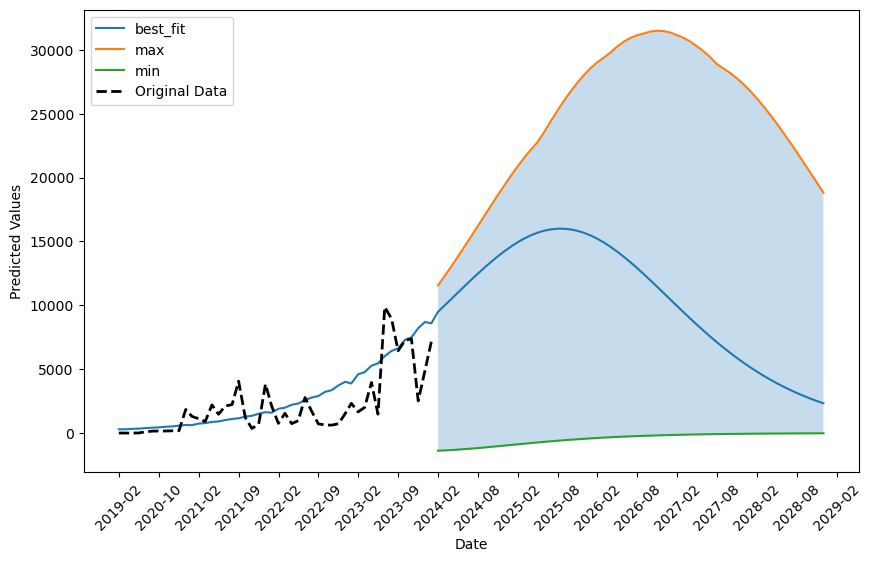

In [62]:
model_logistic = LogisticModel(best_fit_params_logistic['a'][0])
prediction_model_logistic = partial(model_logistic.c_t, b=best_fit_params_logistic['b'][0], c=best_fit_params_logistic['c'][0])
predictions_logistic = time_range_log3.apply(prediction_model_logistic)
predictions_logistic = predictions_logistic.diff().dropna()
predictions_logistic.iloc[0] = predictions_logistic.iloc[1]   # Get rid of weirdly high first value
predictions_logistic.index = time_range_log3.drop(0).reset_index(drop=True)
predictions_logistic = predictions_logistic.drop(61)

output_all_canada_logistic_plot = pd.concat([predictions_logistic.rename('best_fit'), output_all_canada_logistic_summarized], axis=1)
# output_all_canada_logistic.index = time_range2
output_all_canada_logistic_plot.plot(legend=False, figsize=(10, 6))

plt.fill_between(
    output_all_canada_logistic_plot.index,
    output_all_canada_logistic_plot['min'],
    output_all_canada_logistic_plot['max'],
    alpha=0.25
)

# Plot original data
plt.plot(models_21_24_log, label='Original Data', color='black', linewidth=2, linestyle='--')
# only tick every 6th month
tick_positions = np.arange(14, len(data_coverage_log) + 14, 6)
tick_labels    = data_coverage_log.strftime('%Y-%m')[0::6]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Predicted Values')

# legend
plt.legend()
plt.show()

In [ ]:
output_all_canada_logistic.to_excel('all_canada_logistic_predictions_05_01_26.xlsx', index=True)

# Gompertz Model

In [53]:
params_gompertz = pd.read_csv('..\\all_canada_gompertz_06_01_2026\\all_canada_param_sims_gompertz.csv')
params_gompertz = params_gompertz.loc[(params_gompertz['a'] > 0)&(params_gompertz['b'] > 0)&(params_gompertz['c'] > 0), :].reset_index(drop=True)
params_gompertz

,a,b,c
0,7.408510e+07,0.019405,6.241192
1,5.808353e+08,0.017654,7.646979
2,2.864365e+08,0.017226,7.061311
3,4.498516e+08,0.011089,11.260102
4,1.021763e+09,0.016095,8.004443
...,...,...,...
345,6.655993e+07,0.009335,12.731952
346,6.755260e+06,0.006000,13.970457
347,3.438974e+08,0.017674,7.129280
348,5.830367e+08,0.000833,18.300846


In [68]:
params_gompertz.describe()

,a,b,c
count,3.500000e+02,350.000000,350.000000
mean,3.240432e+08,0.013290,10.011378
std,2.318012e+08,0.007543,4.929643
min,1.691447e+06,0.000295,0.055293
25%,1.382399e+08,0.006994,6.013280
50%,2.816068e+08,0.013092,10.244770
75%,4.635812e+08,0.019456,14.095375
max,1.072584e+09,0.029251,18.522129


In [69]:
params_gompertz = params_gompertz[(params_gompertz['b'] > params_gompertz['b'].quantile(0.025)) &
                                  (params_gompertz['b'] < params_gompertz['b'].quantile(0.975))]
params_gompertz = params_gompertz[(params_gompertz['c'] > params_gompertz['c'].quantile(0.025)) &
                                  (params_gompertz['c'] < params_gompertz['c'].quantile(0.975))].reset_index(drop=True)
params_gompertz = params_gompertz[(params_gompertz['a'] > params_gompertz['a'].quantile(0.025)) &
                                  (params_gompertz['a'] < params_gompertz['a'].quantile(0.975))].reset_index(drop=True)

In [70]:
# Same for gompertz
time_range_log2_orig = original_data_log_gomp.loc[(original_data_log_gomp['months_passed_01_2021'] >= 0)|(original_data_log_gomp['2021-2024_Total_EV_Sales'] > 0), 'months_passed_01_2021'].reset_index(drop=True)
time_range_log2 = time_range_log2_orig + np.abs(time_range_log2_orig.min())

output_all_canada_gomp = pd.DataFrame()
for i in range(len(params_gompertz)):
    model = GompertzModel(params_gompertz.loc[i, 'a'])
    prediction_model = partial(model.c_t, b=params_gompertz.loc[i, 'b'], c=params_gompertz.loc[i, 'c'])
    predictions = time_range_log.apply(prediction_model)
    output_all_canada_gomp = pd.concat([output_all_canada_gomp, predictions.rename(i)], axis=1)

In [71]:
output_all_canada_gomp.index = time_range_log

output_all_canada_gomp = output_all_canada_gomp.diff()
output_all_canada_gomp = output_all_canada_gomp.dropna(axis=0, how='all')
output_all_canada_gomp

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
62,410044.507651,2.002194e+06,1.044438e+06,95666.243339,43537.176780,101425.043951,2090.150601,11834.769621,251.168515,531.059548,...,17.949611,9.389442e+05,74.477482,203780.843955,1.909522e+06,247.515406,1.778496e+06,3424.950327,1.319926e+06,36.514811
63,417057.905071,2.058077e+06,1.070428e+06,100741.524334,46082.935793,106832.896319,2207.140651,12472.313533,264.455504,560.221536,...,18.655327,9.624815e+05,78.198304,212175.711396,1.891642e+06,261.228757,1.815324e+06,3626.892614,1.352590e+06,38.164017
64,423894.930954,2.113847e+06,1.096282e+06,106012.642426,48745.081725,112451.081857,2329.812039,13135.654548,278.367642,590.791968,...,19.386265,9.858996e+05,82.085357,220747.458567,1.873216e+06,275.613047,1.851617e+06,3838.365201,1.385041e+06,39.880579
65,430548.844885,2.169442e+06,1.121973e+06,111483.208841,51527.033104,118283.570299,2458.392359,13825.372054,292.930249,622.828321,...,20.143227,1.009174e+06,86.145088,229492.319810,1.854281e+06,290.696204,1.887336e+06,4059.677768,1.417242e+06,41.666928
66,437013.338667,2.224802e+06,1.147474e+06,117156.718617,54432.213207,124334.210475,2593.115921,14542.036796,308.169472,656.389901,...,20.927038,1.032280e+06,90.384153,238406.227805,1.834873e+06,306.507075,1.922444e+06,4291.142941,1.449160e+06,43.525566
67,443282.540833,2.279863e+06,1.172759e+06,123036.542421,57464.045302,130606.721424,2734.223848,15286.209827,324.112310,691.537878,...,21.738545,1.055195e+06,94.809416,247484.820278,1.815026e+06,323.075448,1.956907e+06,4533.075985,1.480759e+06,45.459075
68,449351.019542,2.334567e+06,1.197803e+06,129125.918490,60625.947776,137104.683635,2881.964168,16058.441462,340.786628,728.335319,...,22.578617,1.077895e+06,99.427957,256723.447450,1.794775e+06,340.432066,1.990690e+06,4785.794477,1.512008e+06,47.470114
69,455213.783933,2.388854e+06,1.222581e+06,135427.944719,63921.329157,143831.530432,3036.591895,16859.270231,358.221181,766.847228,...,23.448147,1.100357e+06,104.247077,266117.180227,1.774153e+06,358.608652,2.023761e+06,5049.617976,1.542874e+06,49.561419
70,460866.284006,2.442665e+06,1.247068e+06,141945.570929,67353.583042,150790.539537,3198.369116,17689.221834,376.445628,807.140574,...,24.348052,1.122559e+06,109.274301,275660.819077,1.753194e+06,377.637927,2.056089e+06,5324.867673,1.573326e+06,51.735812
71,466304.409088,2.495944e+06,1.271241e+06,148681.591322,70926.082947,157984.824823,3367.565073,18548.808110,395.490555,849.284331,...,25.279274,1.144479e+06,114.517386,285348.903555,1.731928e+06,397.553626,2.087645e+06,5611.866033,1.603333e+06,53.996196


<Axes: title={'center': 'All Canada Gompertz Predictions'}>

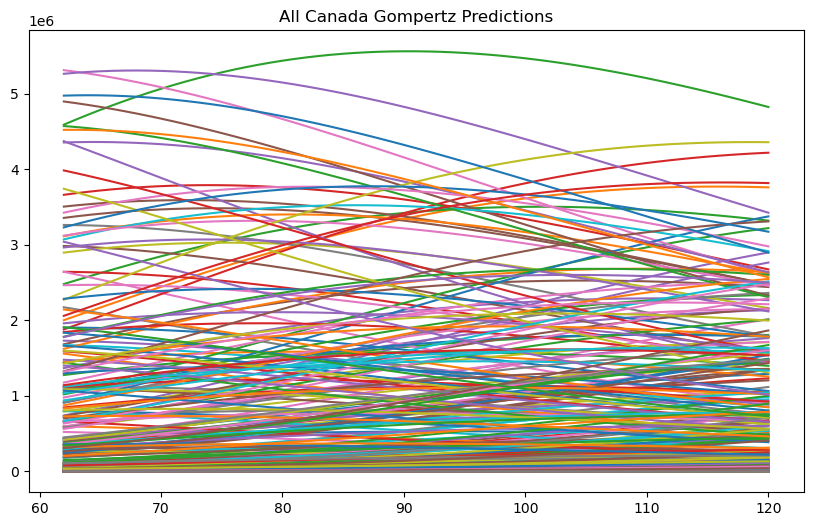

In [72]:
output_all_canada_gomp.plot(legend=False, title='All Canada Gompertz Predictions', figsize=(10, 6))

In [73]:
output_all_canada_gomp_summarized = pd.concat([
    output_all_canada_gomp.max(axis=1).rename('max'),
    output_all_canada_gomp.min(axis=1).rename('min'),
], axis=1)

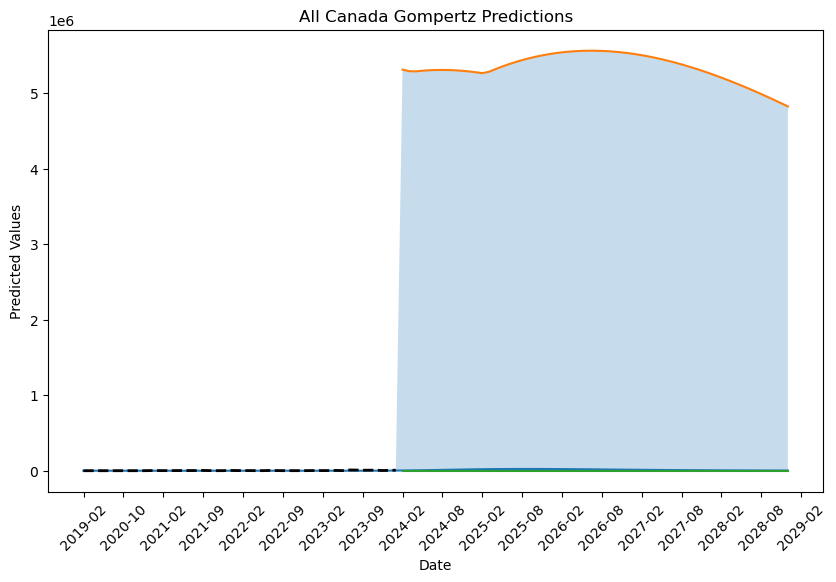

In [74]:
model_gomp = GompertzModel(best_fit_params_logistic['a'][0])
prediction_model_gomp = partial(model_gomp.c_t, b=best_fit_params_logistic['b'][0], c=best_fit_params_logistic['c'][0])
predictions_gomp = time_range_log3.apply(prediction_model_gomp)
predictions_gomp = predictions_gomp.diff().dropna()
predictions_gomp.iloc[0] = predictions_gomp.iloc[1]   # Get rid of weirdly high first value
predictions_gomp.index = time_range_log3.drop(0).reset_index(drop=True)
predictions_gomp = predictions_gomp.drop(61)

output_all_canada_gomp_plot = pd.concat([predictions_gomp.rename('best_fit'), output_all_canada_gomp_summarized], axis=1)
output_all_canada_gomp_plot.plot(legend=False, title='All Canada Gompertz Predictions', figsize=(10, 6))

plt.fill_between(
    output_all_canada_gomp_plot.index,
    output_all_canada_gomp_plot.min(axis=1),
    output_all_canada_gomp_plot.max(axis=1),
    alpha=0.25
)

# Plot original data
plt.plot(models_21_24_log, label='Original Data', color='black', linewidth=2, linestyle='--')
# only tick every 6th month
tick_positions = np.arange(14, len(data_coverage_log) + 14, 6)
tick_labels    = data_coverage_log.strftime('%Y-%m')[0::6]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Predicted Values')
# output_all_canada_gomp.to_excel('all_canada_gompertz_predictions_05_01_26.xlsx', index=True)
plt.show()